In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp

Local_path='/home/jmdeloui/STL_dev/STL_main'
sys.path.append(Local_path)

from STL_2D_Kernel_Torch import STL_2D_Kernel_Torch as DataClass
from ST_Operator import ST_Operator as SO
from Synthesis import optimize_scattering_LBFGS

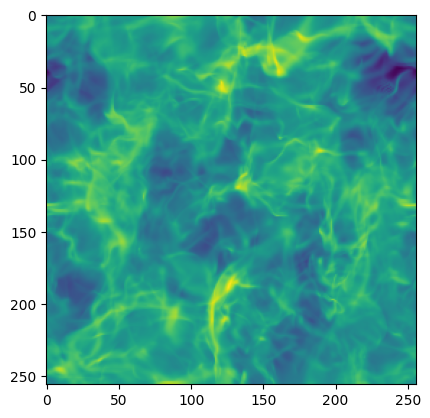

In [2]:
im=np.load(Local_path+'/Certif_2D_Kernel_Torch/Turb_6.npy')[:,None,:,:]
data=DataClass(im)
plt.imshow(im[0,0])

# test wavelet computation

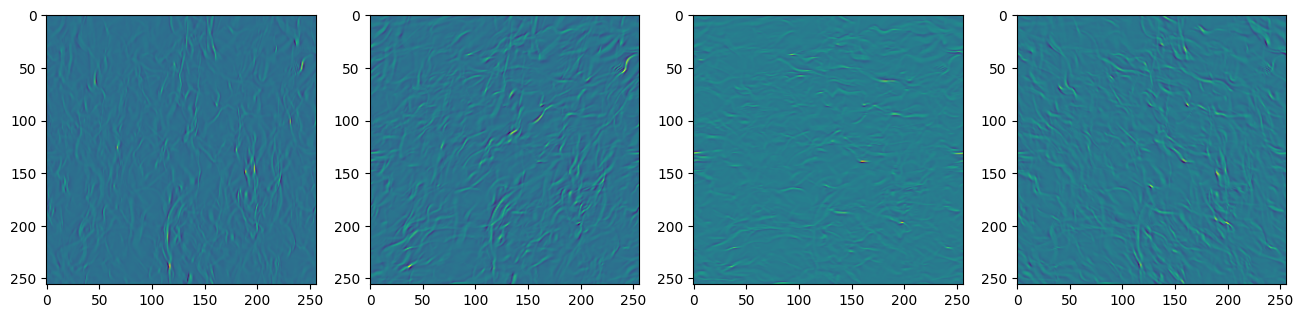

In [3]:
w_op=data.get_wavelet_op()

w_data = w_op.apply(data,0).array

plt.figure(figsize=(16,6))
for k in range(4):
    plt.subplot(1,4,1+k)
    plt.imshow(w_data[0,0,k].cpu().numpy().real)

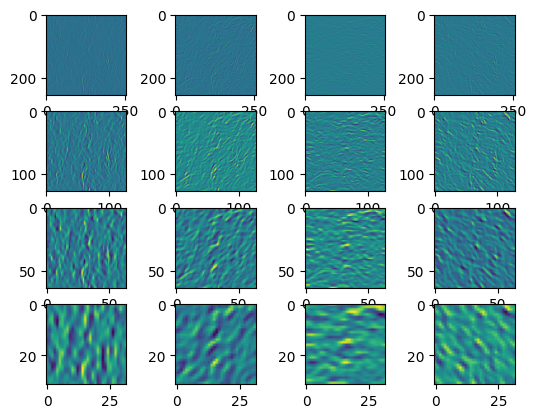

In [4]:
l_data=DataClass(im)
for j in range(4):
    w_data = w_op.apply(l_data,j).array
    for k in range(4):
        plt.subplot(4,4,1+k+4*j)
        plt.imshow(w_data[0,0,k].cpu().numpy().real)
        
    l_data=w_op.downsample(l_data,j+1)

In [5]:
from ST_Operator import ST_Operator as STO

l_data=DataClass(im)

st_op=STO(l_data)

st_data = st_op.apply(l_data)

/home/jmdeloui/miniconda3/envs/py311/lib/python3.11/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/jmdeloui/miniconda3/envs/py311/lib/python3.11/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/jmdeloui/miniconda3/envs/py311/lib/python3.11/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/jmdeloui/miniconda3/envs/py311/lib/python3.11/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


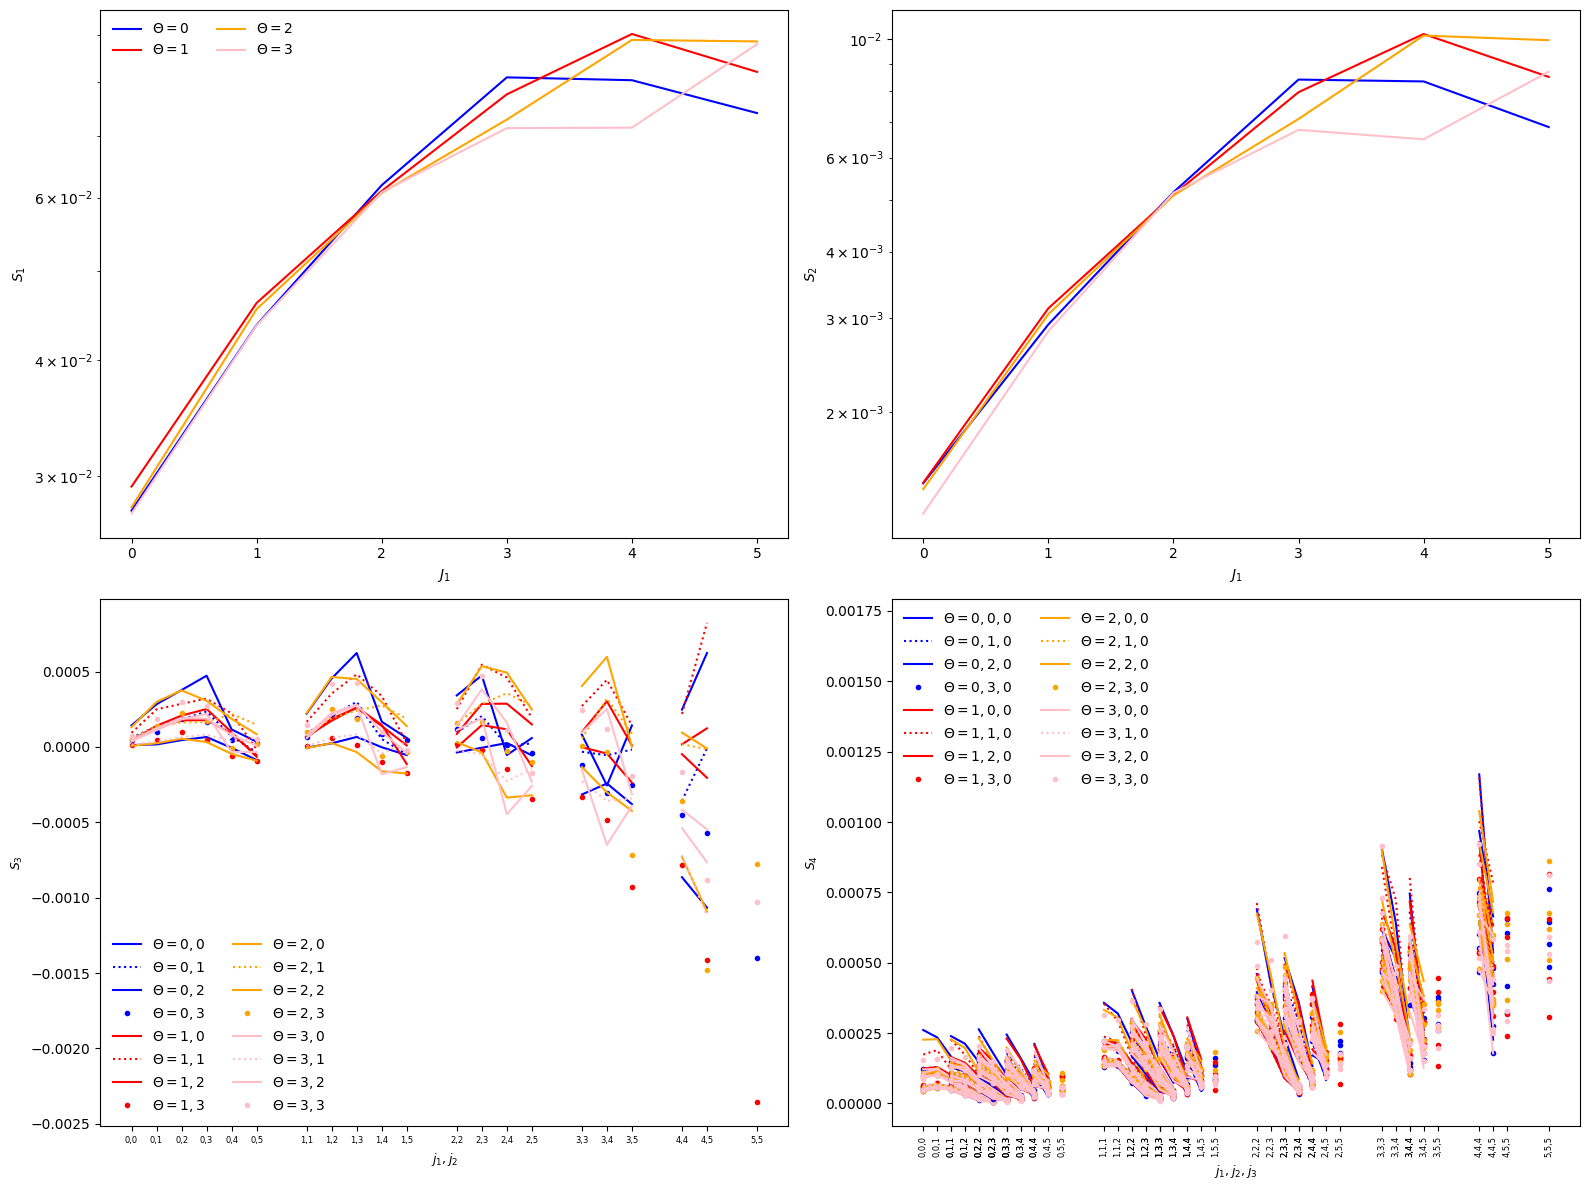

In [6]:
st_data.plot_coeff()

# do synthesis

In [7]:
st_data = st_op.apply(l_data)
st_data_norm = st_op.apply(l_data,norm='store_ref')

/home/jmdeloui/miniconda3/envs/py311/lib/python3.11/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/jmdeloui/miniconda3/envs/py311/lib/python3.11/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


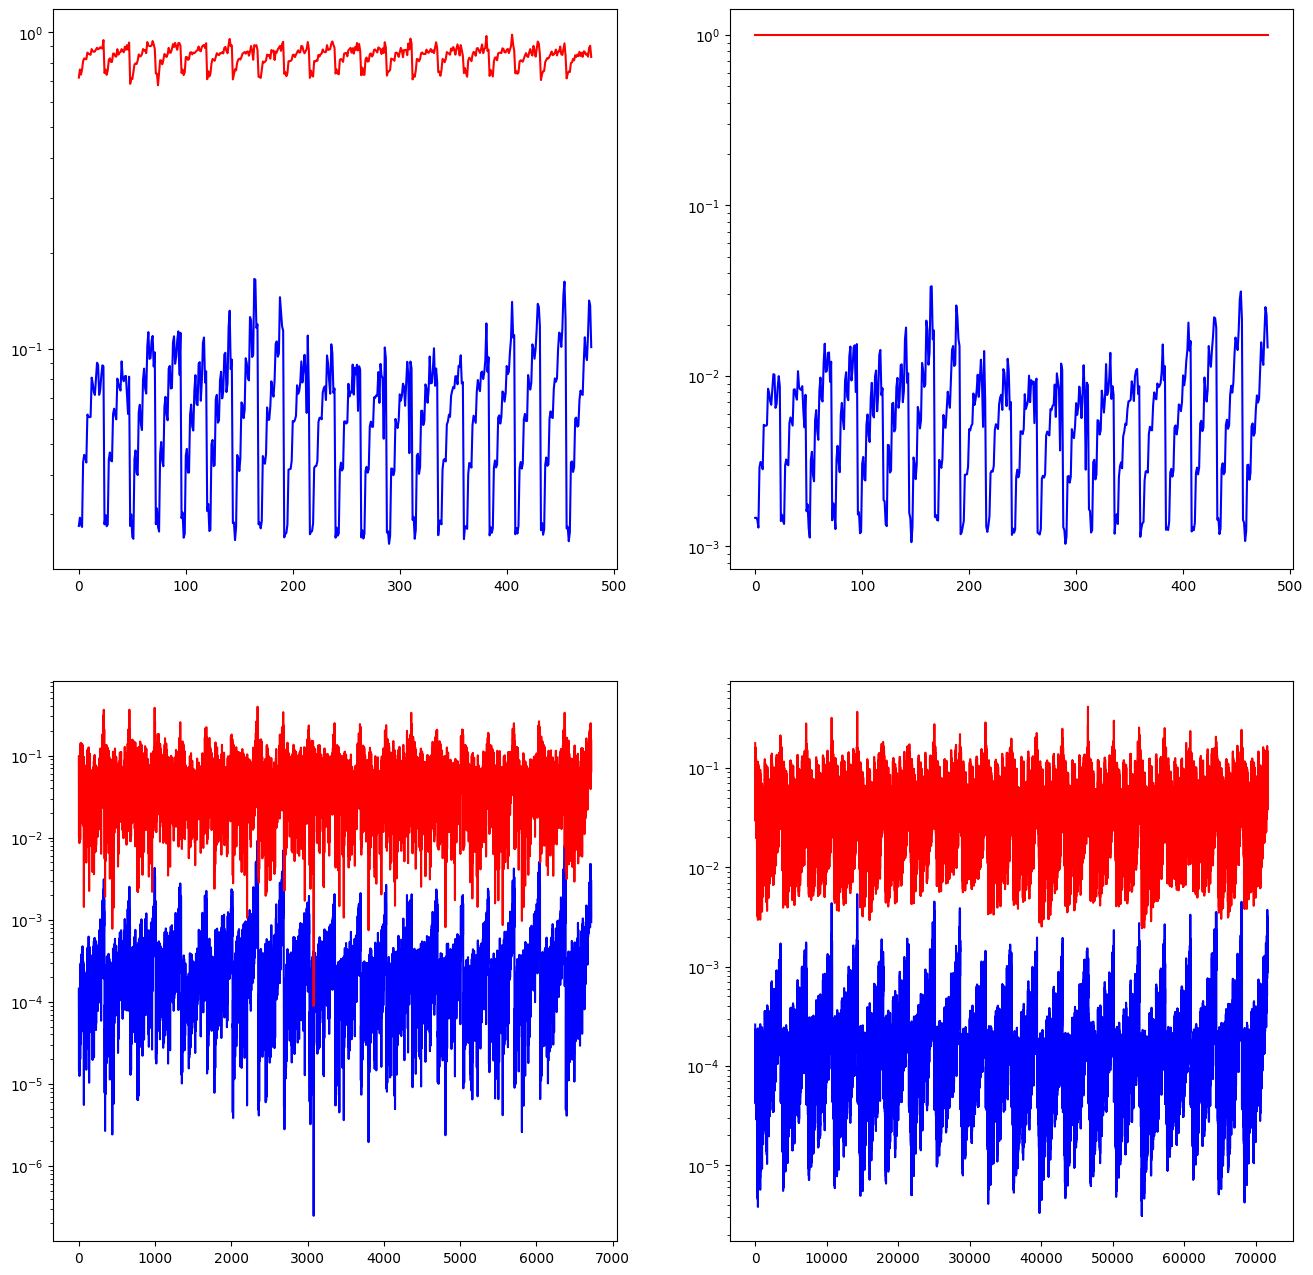

In [8]:
plt.figure(figsize=(16,16))
plt.subplot(2,2,1)
plt.plot(st_data.S1.cpu().numpy().flatten(),color='b')
plt.plot(st_data_norm.S1.cpu().numpy().flatten(),color='r')
plt.yscale('log')
plt.subplot(2,2,2)
plt.plot(st_data.S2.cpu().numpy().flatten(),color='b')
plt.plot(st_data_norm.S2.cpu().numpy().flatten(),color='r')
plt.yscale('log')
def r_nan(x):
    return x[np.isfinite(x)]
plt.subplot(2,2,3)
plt.plot(r_nan(st_data.S3.abs().cpu().numpy().flatten()),color='b')
plt.plot(r_nan(st_data_norm.S3.abs().cpu().numpy().flatten()),color='r')
plt.yscale('log')
plt.subplot(2,2,4)
plt.plot(r_nan(st_data.S4.cpu().numpy().flatten()),color='b')
plt.plot(r_nan(st_data_norm.S4.cpu().numpy().flatten()),color='r')
plt.yscale('log')

# do synthesis

In [9]:
data = DataClass(im)
w_op = data.get_wavelet_op()

#Build the smooth version
target = w_op.apply_smooth(data[0,0]).array.cpu().numpy()


Text(0.5, 1.0, 'Target')

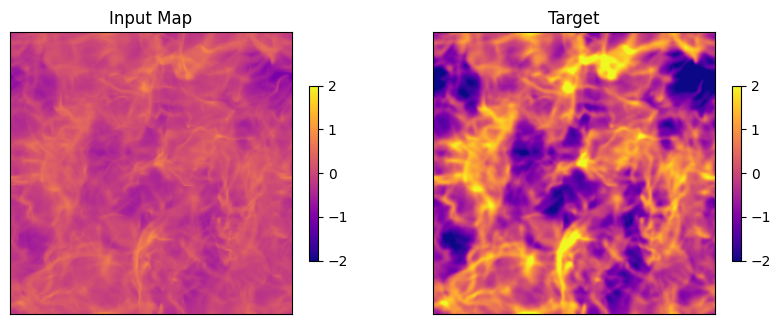

In [10]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(im[0,0]-np.mean(im[0,0]),cmap='plasma',vmin=-2,vmax=2)
plt.colorbar(shrink=0.5)
plt.xticks([])
plt.yticks([])
plt.title('Input Map')
plt.subplot(2,2,2)
plt.imshow(target-np.mean(target),cmap='plasma',vmin=-2,vmax=2)
plt.colorbar(shrink=0.5)
plt.xticks([])
plt.yticks([])
plt.title('Target')

In [11]:
u,histo = optimize_scattering_LBFGS(
        target,
        DataClass,
        SO,
        nbatch=4,
        max_iter=300,
        lr=1.0,
        history_size=50,
        verbose=True,
        print_iter=30,
    )

[LBFGS] inner iter 30, loss = 8.954977e-01
[LBFGS] inner iter 60, loss = 3.887674e-02
[LBFGS] inner iter 90, loss = 1.118715e-02
[LBFGS] inner iter 120, loss = 5.745710e-03
[LBFGS] inner iter 150, loss = 3.492059e-03
[LBFGS] inner iter 180, loss = 2.524126e-03
[LBFGS] inner iter 210, loss = 1.967412e-03
[LBFGS] inner iter 240, loss = 1.606064e-03
[LBFGS] inner iter 270, loss = 1.357757e-03
[LBFGS] inner iter 300, loss = 1.169431e-03


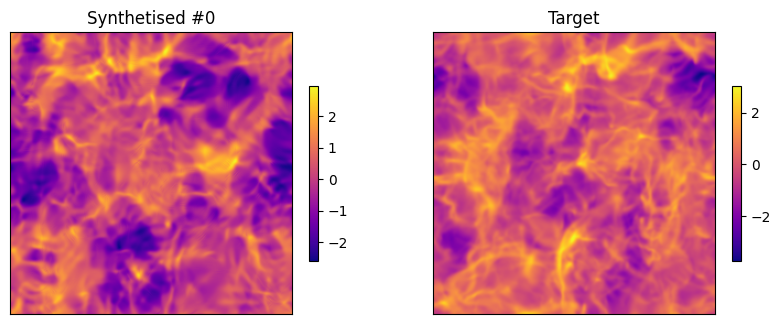

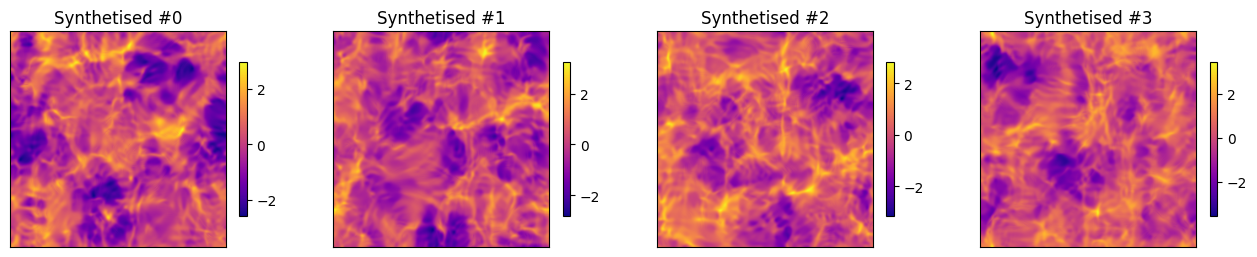

In [15]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(u[0].cpu().numpy(),cmap='plasma')
plt.colorbar(shrink=0.5)
plt.xticks([])
plt.yticks([])
plt.title('Synthetised #0')
plt.subplot(2,2,2)
plt.imshow(target-np.mean(target),cmap='plasma')
plt.colorbar(shrink=0.5)
plt.xticks([])
plt.yticks([])
plt.title('Target')

plt.figure(figsize=(16,4))
for k in range(4):
    plt.subplot(1,4,1+k)
    plt.imshow(u[k].cpu().numpy(),cmap='plasma')
    plt.colorbar(shrink=0.5)
    plt.xticks([])
    plt.yticks([])
    plt.title('Synthetised #%d'%(k))